*Itération 2 : S’interfacer à une BDD* et *Itération 3*


- *SQLAlchemy*  : Open Source Python SQL toolkit and Object Relational Mapper. SQLAlchemy a opté pour l'utilisation du pattern Data Mapper2 plutôt que l'active record utilisés par de nombreux autres ORM.
- *SQLite* : bibliothèque écrite en langage C qui propose un moteur de base de données relationnelle accessible par le langage SQL. Contrairement aux serveurs de bases de données traditionnels, comme MySQL ou PostgreSQL, sa particularité est de ne pas reproduire le schéma habituel client-serveur mais d'être directement intégrée aux programmes. L'intégralité de la base de données (déclarations, tables, index et données) est stockée dans un fichier indépendant de la plateforme.



# Billboard 200 

## C1 - Installation de SQLite 

/

## C2 - S’interfacer avec un GUI 

/

## C3 - S’interfacer avec Python

In [1]:
import sqlite3

MyDB_path = 'OneDrive/Documents/BDD/R2.1_billboard/billboard-200.db'
Request='''SELECT * FROM albums WHERE album LIKE 'as%' '''

def OpenDataBase(MyDB_path, Request):
    connexion = sqlite3.connect(MyDB_path)
    curseur = connexion.cursor()
    curseur.execute(Request)
    Result = curseur.fetchall()
    connexion.close()
    return [list(f) for f in Result]  #to convert a list of tuples in a list of string

Resultat1=OpenDataBase(MyDB_path, Request)
Resultat1

[[7, '2019-01-19', 'Travis Scott', 'ASTROWORLD', '6', 17, 207191.82352941178],
 [208,
  '2019-01-12',
  'Travis Scott',
  'ASTROWORLD',
  '7',
  17,
  207191.82352941178],
 [411,
  '2019-01-05',
  'Travis Scott',
  'ASTROWORLD',
  '10',
  17,
  207191.82352941178],
 [607,
  '2018-12-29',
  'Travis Scott',
  'ASTROWORLD',
  '6',
  17,
  207191.82352941178],
 [807,
  '2018-12-22',
  'Travis Scott',
  'ASTROWORLD',
  '6',
  17,
  207191.82352941178],
 [1009,
  '2018-12-15',
  'Travis Scott',
  'ASTROWORLD',
  '8',
  17,
  207191.82352941178],
 [1202,
  '2018-12-08',
  'Travis Scott',
  'ASTROWORLD',
  '1',
  17,
  207191.82352941178],
 [1408,
  '2018-12-01',
  'Travis Scott',
  'ASTROWORLD',
  '7',
  17,
  207191.82352941178],
 [1611,
  '2018-11-24',
  'Travis Scott',
  'ASTROWORLD',
  '10',
  17,
  207191.82352941178],
 [1809,
  '2018-11-17',
  'Travis Scott',
  'ASTROWORLD',
  '8',
  17,
  207191.82352941178],
 [2010,
  '2018-11-10',
  'Travis Scott',
  'ASTROWORLD',
  '9',
  17,
  2071

In [2]:
# Top 10 albums with the most weeks at Number One :
MyDB_path = 'OneDrive/Documents/BDD/R2.1_billboard/billboard-200.db'
Request='''/* Top 10 albums of All-Time */
SELECT album, artist, CAST (albums.rank AS INT) as rankint, count(albums.date)
FROM albums
WHERE rankint=1
GROUP BY album
ORDER BY count(albums.date) DESC
LIMIT 10 '''

Resultat1 = OpenDataBase(MyDB_path, Request)
Resultat1

[['Thriller', 'Michael Jackson', 1, 37],
 ['Days Of Wine And Roses', 'Andy Williams', 1, 33],
 ['Rumours', 'Fleetwood Mac', 1, 31],
 ['21', 'Adele', 1, 25],
 ['Saturday Night Fever', 'Soundtrack', 1, 24],
 ['Purple Rain (Soundtrack)', 'Prince And The Revolution', 1, 24],
 ["Please Hammer Don't Hurt 'Em", 'M.C. Hammer', 1, 21],
 ['The Bodyguard', 'Whitney Houston', 1, 20],
 ["Ropin' The Wind", 'Garth Brooks', 1, 18],
 ['More Of The Monkees', 'The Monkees', 1, 18]]

In [3]:
# Top 10 albums artists of All-Time (1963-2015)
MyDB_path = 'OneDrive/Documents/BDD/R2.1_billboard/billboard-200.db'
Request='''SELECT albums.date,
	CASE strftime('%m',albums.date)
	    WHEN '12' THEN strftime('%Y',date(albums.date,'+1 months'))
		ELSE strftime('%Y',albums.date)
	END chart_year,
   sum(201 - CAST (albums.rank AS INT)) AS pts,
   CAST (albums.rank AS INT) AS rankint,
   artist
FROM albums
WHERE chart_year>'1962' AND chart_year<'2016' AND artist!='Various Artists' AND artist!='Soundtrack'
GROUP BY artist
ORDER BY pts DESC
LIMIT 10; '''

Resultat1 = OpenDataBase(MyDB_path, Request)
[rslt[4] for rslt in Resultat1]

['The Beatles',
 'Barbra Streisand',
 'The Rolling Stones',
 'Original Cast',
 'Elton John',
 'Elvis Presley',
 'Garth Brooks',
 'Rod Stewart',
 'The Beach Boys',
 'Michael Jackson']

## C4 - S’interfacer avec Pandas 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('OneDrive/Documents/BDD/R2.1_billboard/billboard-200.db')
mydb = pd.read_sql('SELECT * FROM acoustic_features', con=conn)
mydb.set_index(pd.to_datetime(mydb.date), inplace=True)
print(type(mydb))
print(mydb.shape)

<class 'pandas.core.frame.DataFrame'>
(339855, 19)


### 1. Effectuez la moyenne par année de toutes les caractéristiques. Quelle est la tendance que  vous constatez ? 

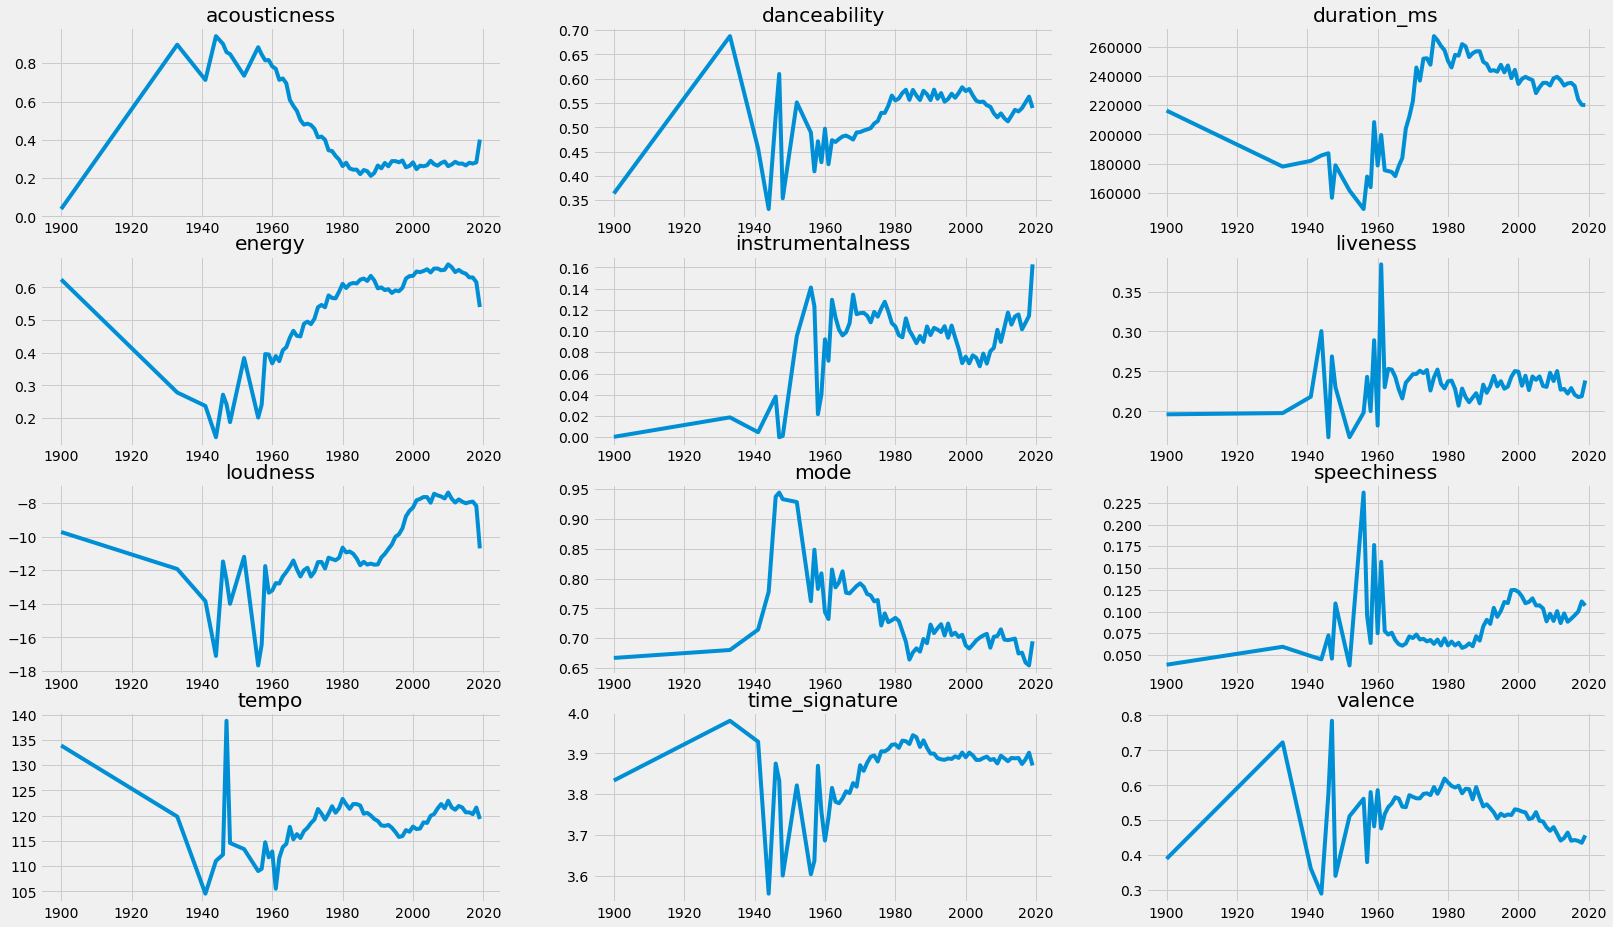

In [5]:
means = mydb.groupby(mydb.index.year).mean().drop('key', axis=1)

with plt.style.context('fivethirtyeight'):
    fig, axes = plt.subplots(4, 3, figsize=(25, 15)) # sharex=True
    for i, col in enumerate(means):
        axes.flatten()[i].plot(means[col])
        axes.flatten()[i].set_title(col)

On constate une grande variabilité et peu de points de mesure avant les années 60.

### 2. Quelle est l’année dont le niveau sonore «loudness » a été le plus haut ? 

In [6]:
print("le niveau sonore «loudness» maximal,", max(mydb.loudness), ", a été atteint en",mydb.loudness.idxmax().year)
mydb.loc[mydb['loudness'] >= max(mydb.loudness)]

print("l’année dont le niveau sonore «loudness» a été le plus haut", max(means['loudness']),"en", means.loc[means['loudness'] >= max(means.loudness)].index[0])


le niveau sonore «loudness» maximal, 3.744 , a été atteint en 1973
l’année dont le niveau sonore «loudness» a été le plus haut -7.38128692439398 en 2010


### 3. Quelle est la clé musicale la plus populaire - en prenant en compte le mode (e.g. majeur,  mineur) ? 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('OneDrive/Documents/BDD/R2.1_billboard/billboard-200.db')
mydb = pd.read_sql('SELECT * FROM acoustic_features', con=conn)
mydb.set_index(pd.to_datetime(mydb.date), inplace=True)
mydb.rename(columns={"mode": "maj_min"}, inplace=True)
mydb['key']=mydb['key'].replace([0,1,2,3,4,5,6,7,8,9,10,11],['C','C#','D','D#',"E",'F','F#','G','G#','A','A#','B'])

<AxesSubplot:>

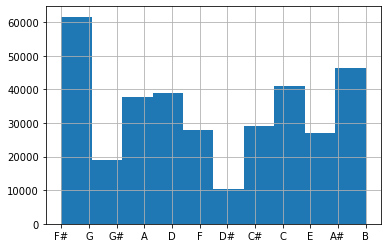

In [8]:
mydb.key.hist()

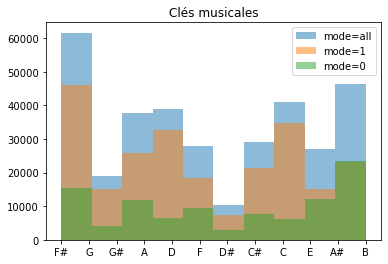

In [9]:
plt.hist(mydb.key[mydb['maj_min']>=0], 
         alpha=0.5, 
         label='mode=all') 

plt.hist(mydb.key[mydb['maj_min']==1], 
         alpha=0.5, 
         label='mode=1') 

plt.hist(mydb.key[mydb['maj_min']==0],  
         alpha=0.5, 
         label='mode=0') 
   
plt.legend(loc='upper right') 
plt.title('Clés musicales') 
plt.show()

In [10]:
# matrice de confusion
pd.crosstab([mydb.index.year, mydb.maj_min], mydb.key)

key              A   A#    B     C   C#     D   D#    E    F   F#     G   G#
row_0 maj_min                                                               
1900  0.0        0    0    0     0    1     0    0    0    0    0     0    3
      1.0        0    0    2     0    2     0    0    0    0    2     0    2
1933  0.0        4    4    0     1    0     1    2    0    3    0     1    0
      1.0        0    3    0     4    3     0    8    0    3    0     8    5
1941  0.0        0    0    0     2    0     1    0    0    0    0     0    1
...            ...  ...  ...   ...  ...   ...  ...  ...  ...  ...   ...  ...
2017  1.0      698  434  371  1113  864  1009  216  438  588  369  1025  568
2018  0.0      450  372  507   275  343   237  117  426  437  355   311  182
      1.0      722  414  394  1087  930   979  210  401  521  416   926  585
2019  0.0       42   27   52    33   40    21    5   30   31   34    27   11
      1.0       72   49   28   133   87   109   23   49   56   32   111   54

[144 rows x 12 columns]

In [11]:
mydb_mode0=mydb["key"][(mydb["maj_min"]==0)]
print(pd.crosstab(mydb_mode0.index.year, mydb_mode0))

mydb_mode1=mydb["key"][(mydb["maj_min"]==1)]
print(pd.crosstab(mydb_mode1.index.year, mydb_mode1))

key      A   A#    B    C   C#    D   D#    E    F   F#    G   G#
row_0                                                            
1900     0    0    0    0    1    0    0    0    0    0    0    3
1933     4    4    0    1    0    1    2    0    3    0    1    0
1941     0    0    0    2    0    1    0    0    0    0    0    1
1944     1    0    0    0    0    0    1    0    0    0    2    0
1946     0    0    0    1    0    0    0    0    0    0    0    0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
2015   495  423  592  273  402  286  149  488  421  373  321  201
2016   396  384  500  240  331  283  123  406  385  310  285  197
2017   398  380  496  300  332  246  133  438  422  352  287  197
2018   450  372  507  275  343  237  117  426  437  355  311  182
2019    42   27   52   33   40   21    5   30   31   34   27   11

[72 rows x 12 columns]
key      A   A#    B     C   C#     D   D#    E    F   F#     G   G#
row_0                                            

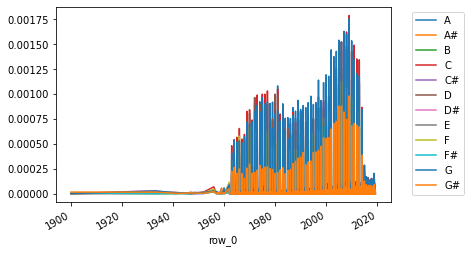

In [12]:
pd.crosstab(mydb.index, mydb['key'], normalize=True).plot()
plt.legend(bbox_to_anchor = (1.05, 1));

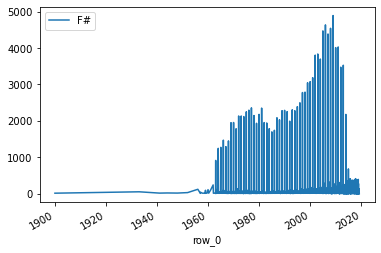

In [13]:
pd.crosstab(mydb.index, mydb['key'][4], normalize=False).plot()
plt.legend(loc='best');

# Itération 3

In [14]:
import sqlite3

In [15]:
def OpenDataBase(MyDB_path, Request):
    connexion = sqlite3.connect(MyDB_path)
    curseur = connexion.cursor()
    curseur.execute(Request)
    Result = curseur.fetchall()
    connexion.close()
    return [list(f) for f in Result]  #to convert a list of tuples in a list of string

In [16]:
def CreateTable(MyDB_path, Request_tables):
    for Req in list(Request_tables.split(';')):
        # print(Req1)
        connexion = sqlite3.connect(MyDB_path)
        curseur = connexion.cursor()
        curseur.execute(Req)
        connexion.commit()
    
    curseur.execute(    '''
    SELECT 
        name
    FROM 
        sqlite_schema
    WHERE 
        type ='table' AND 
        name NOT LIKE 'sqlite_%';
    ''')
    Result = curseur.fetchall()
    connexion.close()    
    return Result

In [17]:
# import pyodbc
import pandas as pd
# from sqlalchemy import create_engine

def Send_to_DataBase(MyDB_path, tablename, df, if_exists='append'):  
    connexion = sqlite3.connect(MyDB_path)
   # engine = create_engine('sqlite://', echo=False)
    df.to_sql(name=tablename, con=connexion, if_exists=if_exists, index=False) # append vs replace
    curseur = connexion.cursor()
    curseur.execute("SELECT * FROM " + tablename)
    Result = curseur.fetchall()
    curseur.close()
    connexion.close()
    return [list(f) for f in Result]  #to convert a list of tuples in a list of string

In [18]:
MyDB_path = str(r"C:\Users\renau\OneDrive\Documents\BDD\iteration3\gtfs_tag.db")

## Création des tables

In [19]:
Request_tables='''
CREATE TABLE IF NOT EXISTS "agencies" (
	"agency_id"	INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
	"agency_name"	TEXT NOT NULL,
	"agency_url"	TEXT,
	"agency_timezone"	TEXT,
	"agency_lang"	TEXT,
	"agency_phone"	INTEGER
);
CREATE TABLE IF NOT EXISTS "routes" (
	"routeID"	INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
	"routeName"	TEXT NOT NULL UNIQUE,
	"routeType"	TEXT NOT NULL
);
/*CREATE TABLE IF NOT EXISTS sqlite_sequence(name,seq)*/;
CREATE TABLE IF NOT EXISTS "stop_times" (
	"stopTimeID"	INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
	"trip_id"	INTEGER NOT NULL,
	"stop_id"	INTEGER NOT NULL,
	"arrival_time"	INTEGER NOT NULL,
	"departure_time"	INTEGER NOT NULL,
	"stop_sequence"	INTEGER,
	"pickup_type"	INTEGER
);
CREATE TABLE IF NOT EXISTS "stops" (
	"stopID"	INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
	"gpsLon"	INTEGER NOT NULL,
	"gpsLat"	INTEGER NOT NULL,
	"stopName"	TEXT NOT NULL UNIQUE
);
CREATE TABLE IF NOT EXISTS "trips" (
	"trip_id"	INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
	"route_id"	INTEGER NOT NULL,
	"trip_headsign"	TEXT NOT NULL,
	"service_id"	TEXT NOT NULL,
	"direction_id"	INTEGER NOT NULL,
	"shape_id"	TEXT NOT NULL,
	"wheelchair_accessible"	INTEGER NOT NULL,
	"bikes_allowed"	INTEGER NOT NULL
);
'''

In [20]:
import sqlite3

Resultat1=CreateTable(MyDB_path, Request_tables)
print("les tables présentes dans la base sont :",Resultat1)

les tables présentes dans la base sont : [('routes',), ('stopTimes',), ('stops',), ('stop_times',), ('agencies',), ('trips',)]


## Remplissage des tables

In [21]:
df_stop_times = pd.read_csv(r'C:\Users\renau\OneDrive\Documents\BDD\iteration3\SEM-GTFS\stop_times.txt', header = 0)
df_stop_times

,trip_id,stop_id,arrival_time,departure_time,stop_sequence,pickup_type
0,25485431,6806,07:22:00,07:22:00,1,0
1,25485431,6805,07:24:00,07:24:00,2,0
2,25485431,4905,07:27:00,07:27:00,3,0
3,25485431,4202,07:28:00,07:28:00,4,0
4,25485431,4343,07:29:00,07:29:00,5,0
...,...,...,...,...,...,...
363640,26429058,4511,25:09:00,25:09:00,6,0
363641,26429058,4509,25:12:00,25:12:00,7,0
363642,26429058,4623,25:15:00,25:15:00,8,0
363643,26429058,4626,25:18:00,25:18:00,9,0


In [22]:
Send_to_DataBase(MyDB_path, 'stop_times', df_stop_times, 'replace')

[[25485431, 6806, '07:22:00', '07:22:00', 1, 0],
 [25485431, 6805, '07:24:00', '07:24:00', 2, 0],
 [25485431, 4905, '07:27:00', '07:27:00', 3, 0],
 [25485431, 4202, '07:28:00', '07:28:00', 4, 0],
 [25485431, 4343, '07:29:00', '07:29:00', 5, 0],
 [25485431, 4340, '07:30:00', '07:30:00', 6, 0],
 [25485431, 4139, '07:32:00', '07:32:00', 7, 0],
 [25485431, 2288, '07:32:00', '07:32:00', 8, 0],
 [25485431, 4136, '07:37:00', '07:37:00', 9, 0],
 [25485431, 4134, '07:38:00', '07:38:00', 10, 0],
 [25485431, 4132, '07:39:00', '07:39:00', 11, 0],
 [25485431, 4130, '07:40:00', '07:40:00', 12, 0],
 [25485431, 4122, '07:42:00', '07:42:00', 13, 0],
 [25485431, 4120, '07:44:00', '07:44:00', 14, 0],
 [25485431, 1577, '07:48:00', '07:48:00', 15, 0],
 [25485431, 1318, '07:49:00', '07:49:00', 16, 0],
 [25485431, 1937, '07:50:00', '07:50:00', 17, 0],
 [25485431, 1624, '07:52:00', '07:52:00', 18, 0],
 [25485431, 4314, '07:54:00', '07:54:00', 19, 0],
 [25485431, 4156, '07:56:00', '07:56:00', 20, 0],
 [2548543

In [23]:
df_agencies = pd.read_csv(r'C:\Users\renau\OneDrive\Documents\BDD\iteration3\SEM-GTFS\agency.txt', header = 0)
list(df_agencies.loc[0])

['SEM',
 'Mobilités M - Tag',
 'https://www.mobilites-m.fr/',
 'Europe/Paris',
 'FR',
 438703870]

In [24]:
print(list(df_agencies.columns))

tablename="agencies"
df = df_agencies

Result2=Send_to_DataBase(MyDB_path, tablename, df, 'replace')
Result2

['agency_id', 'agency_name', 'agency_url', 'agency_timezone', 'agency_lang', 'agency_phone']


[['SEM',
  'Mobilités M - Tag',
  'https://www.mobilites-m.fr/',
  'Europe/Paris',
  'FR',
  438703870]]

In [25]:
df_agencies = pd.read_csv(r'C:\Users\renau\OneDrive\Documents\BDD\iteration3\SEM-GTFS\agency.txt', header = 0)
list(df_agencies.loc[0])

['SEM',
 'Mobilités M - Tag',
 'https://www.mobilites-m.fr/',
 'Europe/Paris',
 'FR',
 438703870]

In [26]:
df_trips = pd.read_csv(r'C:\Users\renau\OneDrive\Documents\BDD\iteration3\SEM-GTFS\trips.txt', header = 0)
list(df_trips.columns)
df_trips

,route_id,trip_id,trip_headsign,service_id,direction_id,shape_id,wheelchair_accessible,bikes_allowed
0,19,25702901,"Sassenage, L'Ovalie",1234567-MSHSAH02_ST5_2_HI2122,1,SEM_19_2,1,2
1,81,26406624,"Le Pont-de-Claix, L'Etoile",12345-MEHLV11_ST8_11_HI2122-MEHW11_ST11_11_HI2122,0,NaN,1,2
2,2,26016265,"Claix, Pont Rouge",12345-MEHLV09_ST8_9_HI2122-MEHLV11_ST8_11_HI21...,0,SEM_C2_2,1,2
3,6,25943512,"Grenoble, Oxford",1234567-MSHSAH02_ST5_2_HI2122,0,NaN,1,2
4,3,25632156,"Grenoble, Victor Hugo",1234567-MEHD00_ST6_0_HI2122,0,SEM_C3_1,1,2
...,...,...,...,...,...,...,...,...
15485,A,25863184,"Le Pont-de-Claix, L'Etoile",12345-MEILVI04_ST21_4_HI2122,0,SEM_A_3,1,2
15486,E,25679075,"Fontanil-Cornillon, Palluel",1234567-MGHS01_ST5_1_HI2122,1,SEM_E_1,1,2
15487,7,26383248,"Gières, Universités - IUT - UFRAPS",12345-MSHLVH06_ST8_6_HI2122-MSHLW06_ST11_6_HI2122,0,SEM_C7_1,1,2
15488,A,26406196,"Fontaine, La Poya",12345-MEHLV11_ST8_11_HI2122-MEHW11_ST11_11_HI2122,1,SEM_A_4,1,2


In [27]:
Send_to_DataBase(MyDB_path, 'trips', df_trips, 'replace')

[['19',
  25702901,
  "Sassenage, L'Ovalie",
  '1234567-MSHSAH02_ST5_2_HI2122',
  1,
  'SEM_19_2',
  1,
  2],
 ['81',
  26406624,
  "Le Pont-de-Claix, L'Etoile",
  '12345-MEHLV11_ST8_11_HI2122-MEHW11_ST11_11_HI2122',
  0,
  None,
  1,
  2],
 ['2',
  26016265,
  'Claix, Pont Rouge',
  '12345-MEHLV09_ST8_9_HI2122-MEHLV11_ST8_11_HI2122-MEHLV13_ST8_13_HI2122-MEHW09_ST11_9_HI2122-MEHW11_ST11_11_HI2122-MEHW13_ST11_13_HI2122-MEILVI04_ST21_4_HI2122',
  0,
  'SEM_C2_2',
  1,
  2],
 ['6',
  25943512,
  'Grenoble, Oxford',
  '1234567-MSHSAH02_ST5_2_HI2122',
  0,
  None,
  1,
  2],
 ['3',
  25632156,
  'Grenoble, Victor Hugo',
  '1234567-MEHD00_ST6_0_HI2122',
  0,
  'SEM_C3_1',
  1,
  2],
 ['A',
  26424650,
  'Fontaine, La Poya',
  '12345-MEHLV13_ST8_13_HI2122-MEHW13_ST11_13_HI2122',
  1,
  'SEM_A_4',
  1,
  2],
 ['20',
  26021203,
  'Seyssinet-Pariset, Seyssinet-Pariset Hôtel de Ville',
  '12345-MSILV03_ST21_3_HI2122',
  0,
  'SEM_20_3',
  1,
  2],
 ['E',
  25716840,
  'Fontanil-Cornillon, Pallue

### Étape 3.4.1 - implémenter une fonction qui génère une commande insertion SQL

In [69]:
def gen_insert_query_1(MyDB_path, table_name, a_dict):
    connexion = sqlite3.connect(MyDB_path)
    curseur = connexion.cursor()
    columns = ', '.join("'" + str(x).replace('/', '_') + "'" for x in a_dict.keys())
    values = ', '.join("'" + str(x).replace('/', '_') + "'" for x in a_dict.values())
    sql = '''INSERT INTO %s ( %s ) VALUES ( %s );''' % (table_name, columns, values)
    curseur.execute(sql)    # pour Python 2 : cursor.execute(sql, myDict.values())
    connexion.close()
    return sql

def gen_insert_query(MyDB_path, table_name, a_dict):
    columns = ', '.join("'" + str(x).replace('/', '_') + "'" for x in a_dict.keys())
    values = ', '.join("'" + str(x).replace('/', '_') + "'" for x in a_dict.values())
    return '''INSERT INTO %s ( %s ) VALUES ( %s );''' % (table_name, columns, values)

In [70]:
a_dict = {'col1': 'value 1', 'col2': 'value 2', 'col3': 'value 3'}
print(gen_insert_query(MyDB_path, 'test', a_dict))

INSERT INTO test ( 'col1', 'col2', 'col3' ) VALUES ( 'value 1', 'value 2', 'value 3' );


### Étape 3.4.2 - implémenter une fonction qui génère des commandes d’insertion SQL

In [89]:
def get_insert_queries(table_name, df):
    liste1=[]
    for a in df.to_dict('records'):
        liste1.append(gen_insert_query(MyDB_path, table_name, a))
    return liste1

In [90]:
table_name="gtfs_stops"
df=df_agencies
print(get_insert_queries(table_name, df))

["INSERT INTO gtfs_stops ( 'agency_id', 'agency_name', 'agency_url', 'agency_timezone', 'agency_lang', 'agency_phone' ) VALUES ( 'SEM', 'Mobilités M - Tag', 'https:__www.mobilites-m.fr_', 'Europe_Paris', 'FR', '438703870' );"]


### Étape 3.4.3 - implémenter une procédure qui crée un fichier SQL

In [94]:
def gen_insert_file(filename, table_name, df):
    with open(filename, "w") as f:
        for i in get_insert_queries(table_name, df):
            f.write(i)

In [95]:
filename=str(r"C:\Users\renau\OneDrive\Documents\BDD\iteration3\insert_stops.sql")
table_name="gtfs_stops"
df=df_agencies

gen_insert_file(filename, table_name, df)

In [103]:
with open(filename) as f:
    firstNlines=f.readlines()[0:5]
print(firstNlines)

["INSERT INTO gtfs_stops ( 'agency_id', 'agency_name', 'agency_url', 'agency_timezone', 'agency_lang', 'agency_phone' ) VALUES ( 'SEM', 'Mobilités M - Tag', 'https:__www.mobilites-m.fr_', 'Europe_Paris', 'FR', '438703870' );"]


### Étape 3.4.4 – Exécutez votre fichier SQL sur la BDD

Afin de rendre la transaction de votre fichier SQL efficace, regardez les mots clés BEGIN et COMMIT du langage SQL. :  
   - BEGIN : début d'une transaction locale explicite. Changes are only visible to the current session.
   - COMMIT : to commit the changes.
   - ROLLBACK : if you don't want to save the changes.
    
[https://www.sqlitetutorial.net/sqlite-transaction/]
